# 1) Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2) Data Reading

In [2]:
df = pd.read_csv("dataset.csv")
df

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,INN36282,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,Online,0,0,0,115.00,1,9/13/2018,Canceled
36281,INN36283,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
36282,INN36284,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
36283,INN36285,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled


In [3]:
# 1) Remove first/last spaces from ALL column names
df.columns = df.columns.str.strip()

str_cols = df.select_dtypes(include="object").columns

# 2) For every string column:
#    - strip()  : remove spaces at the start/end
#    - replace() : exchange any internal whitespace to a single space (e.g., "Room__Type   1" -> "Room Type 1")
df[str_cols] = df[str_cols].apply(
    lambda s: s.str.strip().replace(r"\s+", " ", regex=True)
)

# 3) Data Cleaning 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [5]:
df.isnull().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(columns=["Booking_ID"], inplace=True)

In [8]:
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [9]:
# 1) Encode the target (Canceled / Not_Canceled)
le = LabelEncoder()
df["booking_status_encoded"] = le.fit_transform(df["booking status"])

print("Classes found:", le.classes_)
print(df[["booking status", "booking_status_encoded"]].head())

Classes found: ['Canceled' 'Not_Canceled']
  booking status  booking_status_encoded
0   Not_Canceled                       1
1   Not_Canceled                       1
2       Canceled                       0
3       Canceled                       0
4       Canceled                       0


In [10]:
df.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status,booking_status_encoded
0,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled,1
1,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled,1
2,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled,0
3,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled,0
4,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled,0


In [11]:
df.drop(columns=["booking status"], inplace=True)

In [12]:
for col in df.columns:
    if df[col].dtype == "object":
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
df

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking_status_encoded
0,1,1,2,5,0,0,0,224,3,0,0,0,88.00,0,53,1
1,1,0,1,3,3,0,0,5,4,0,0,0,106.68,1,147,1
2,2,1,1,3,0,0,0,1,4,0,0,0,50.00,0,236,0
3,1,0,0,2,0,0,0,211,4,0,0,0,100.00,1,318,0
4,1,0,1,2,3,0,0,48,4,0,0,0,77.00,0,278,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,2,0,0,2,1,0,0,346,4,0,0,0,115.00,1,502,0
36281,2,0,1,3,0,0,0,34,4,0,0,0,107.55,1,43,1
36282,2,0,1,3,0,0,3,83,4,0,0,0,105.61,1,191,1
36283,3,0,0,4,0,0,0,121,3,0,0,0,96.90,1,423,1


# 4) Drop Outlier

In [13]:
target_col = "booking_status_encoded" if "booking_status_encoded" in df.columns else None

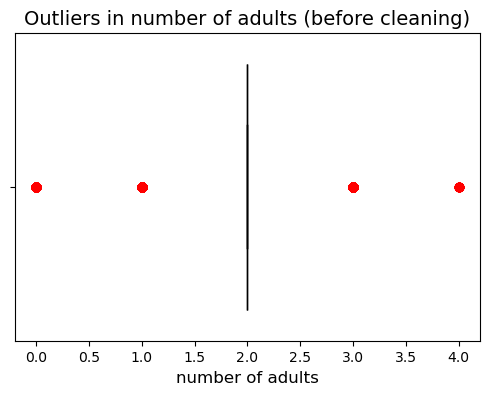

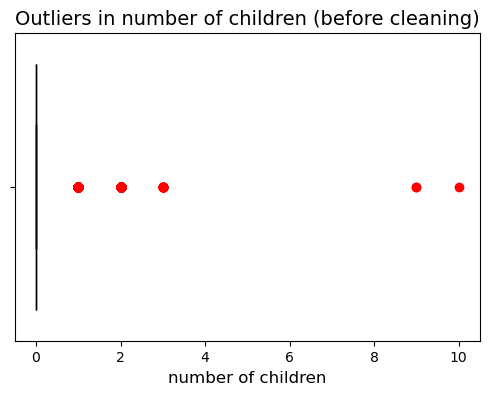

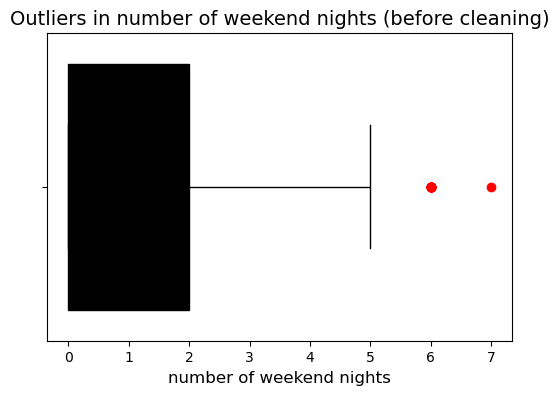

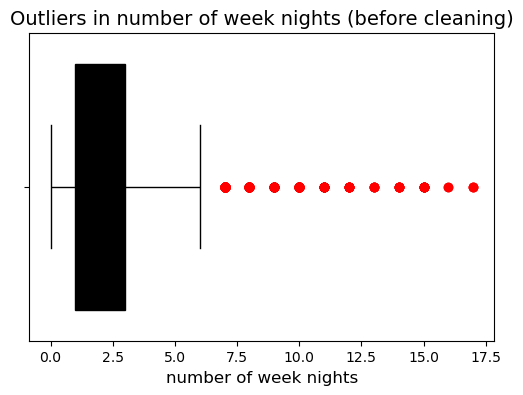

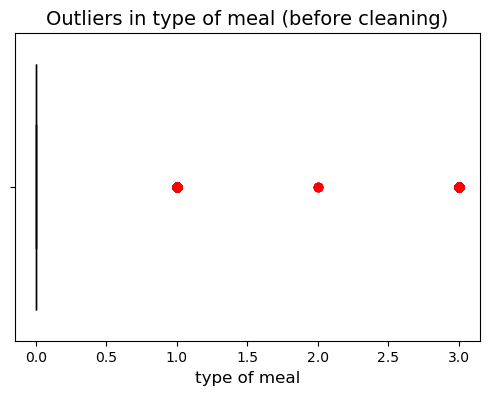

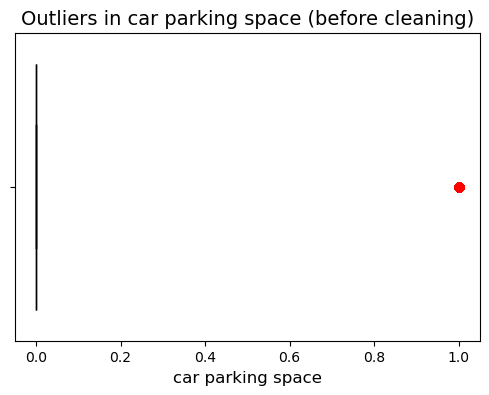

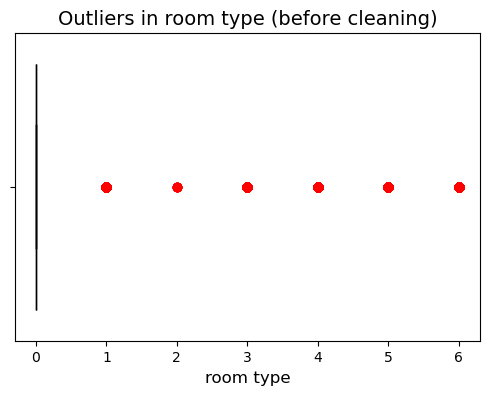

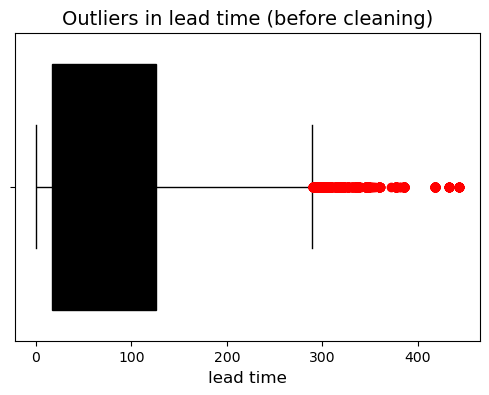

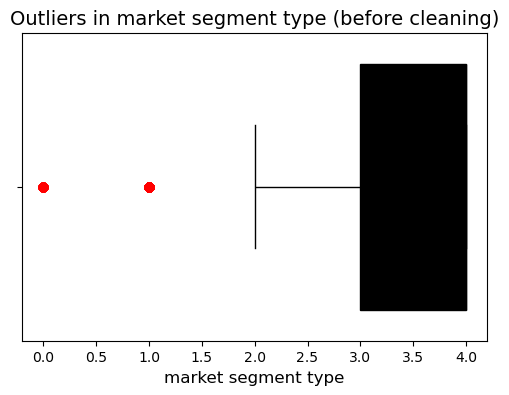

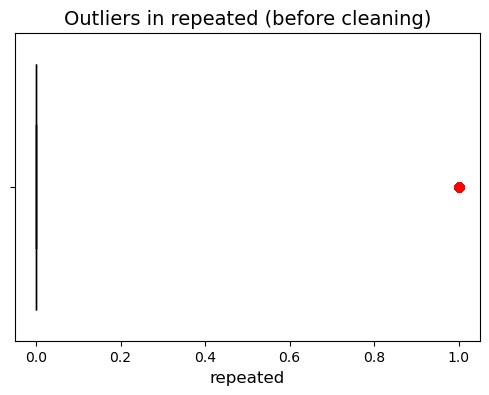

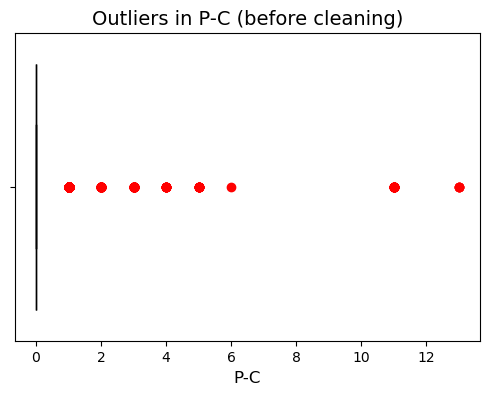

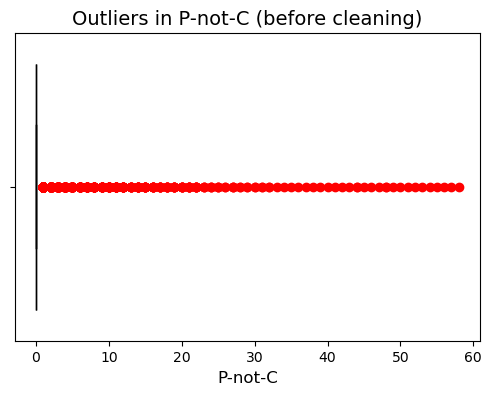

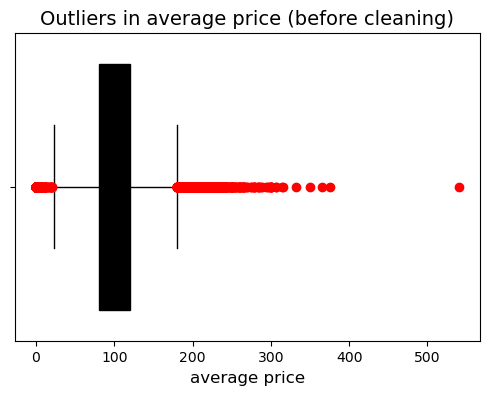

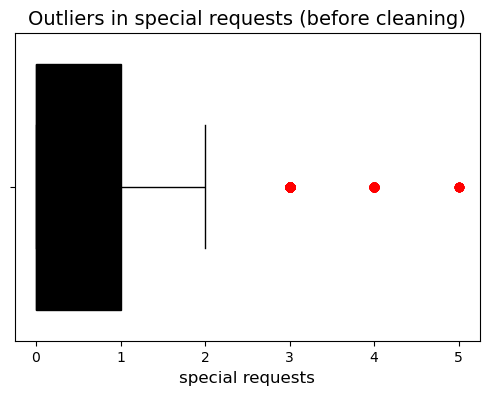

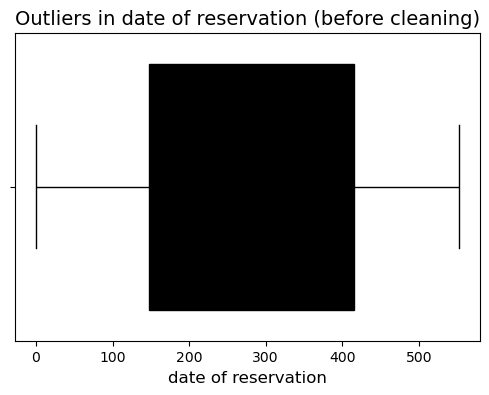

In [14]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if target_col in numeric_cols:
    numeric_cols.remove(target_col)

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(
        x=df[col],
        color="black",
        flierprops=dict(marker='o', markerfacecolor='red',
                        markeredgecolor='red', markersize=6)
    )
    plt.title(f"Outliers in {col} (before cleaning)", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.show()

In [15]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_capped = df.copy()

for col in numeric_cols:
    df_capped[col] = np.where(df_capped[col] < lower_bound[col], 
                              lower_bound[col], df_capped[col])
    df_capped[col] = np.where(df_capped[col] > upper_bound[col], 
                              upper_bound[col], df_capped[col])

print("✅ Capping applied on numeric columns using IQR bounds")

✅ Capping applied on numeric columns using IQR bounds


# 5) Data Normalization / Scaling

In [17]:
X = df_capped.drop(columns=["booking_status_encoded"])  
X

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation
0,2.0,0.0,2.0,5.0,0.0,0.0,0.0,224.0,3.0,0.0,0.0,0.0,88.00,0.0,53.0
1,2.0,0.0,1.0,3.0,0.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,106.68,1.0,147.0
2,2.0,0.0,1.0,3.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,50.00,0.0,236.0
3,2.0,0.0,0.0,2.0,0.0,0.0,0.0,211.0,4.0,0.0,0.0,0.0,100.00,1.0,318.0
4,2.0,0.0,1.0,2.0,0.0,0.0,0.0,48.0,4.0,0.0,0.0,0.0,77.00,0.0,278.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36280,2.0,0.0,0.0,2.0,0.0,0.0,0.0,289.5,4.0,0.0,0.0,0.0,115.00,1.0,502.0
36281,2.0,0.0,1.0,3.0,0.0,0.0,0.0,34.0,4.0,0.0,0.0,0.0,107.55,1.0,43.0
36282,2.0,0.0,1.0,3.0,0.0,0.0,0.0,83.0,4.0,0.0,0.0,0.0,105.61,1.0,191.0
36283,2.0,0.0,0.0,4.0,0.0,0.0,0.0,121.0,3.0,0.0,0.0,0.0,96.90,1.0,423.0


In [18]:
y = df_capped["booking_status_encoded"]
y

0        1
1        1
2        0
3        0
4        0
        ..
36280    0
36281    1
36282    1
36283    1
36284    1
Name: booking_status_encoded, Length: 36285, dtype: int32

In [19]:
# Scale numeric features before PCA to mean = 0 and std = 1 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.select_dtypes(include=[float, int]))

# 6) PCA / Feature Engineering

In [20]:
# Apply PCA (reduce to 2D for preview)
pca = PCA(n_components=2, random_state=42)
X_pca_preview = pca.fit_transform(X_scaled)

print("PCA-transformed shape:", X_pca_preview.shape)

PCA-transformed shape: (36285, 2)


# 7) Data Visualization

In [21]:
corr = df_capped.corr() # Correlation Matrix

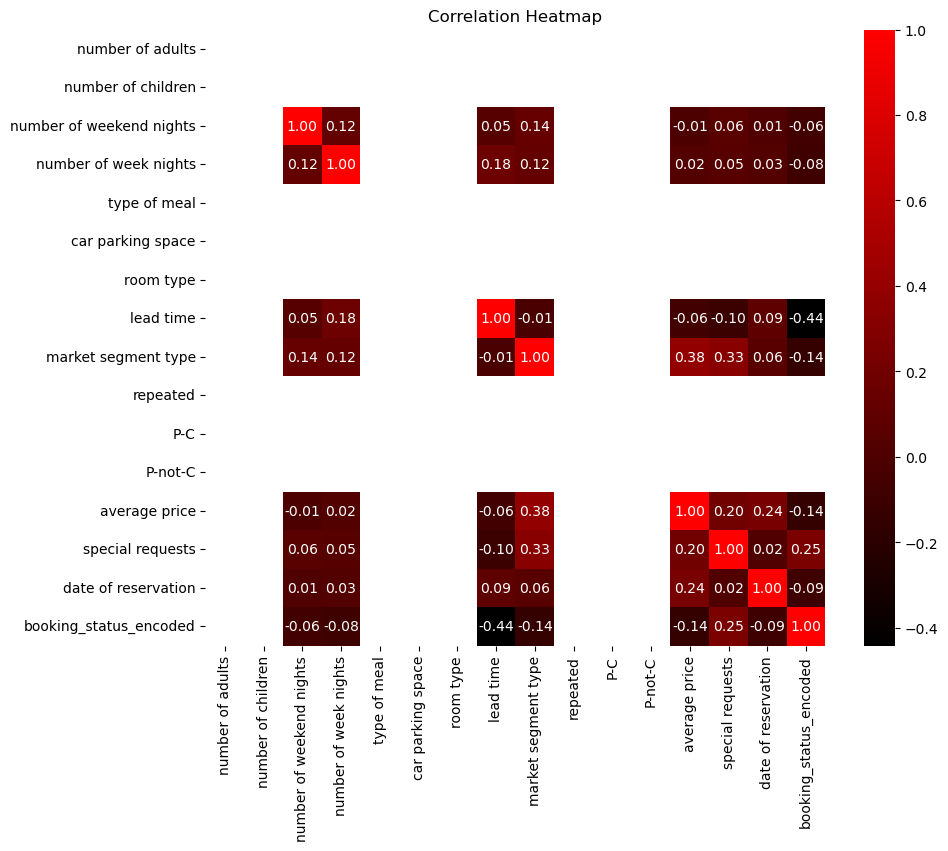

In [22]:
from matplotlib.colors import LinearSegmentedColormap

black_red = LinearSegmentedColormap.from_list("black_red", ["black", "red"])

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap=black_red)
plt.title("Correlation Heatmap")
plt.show()

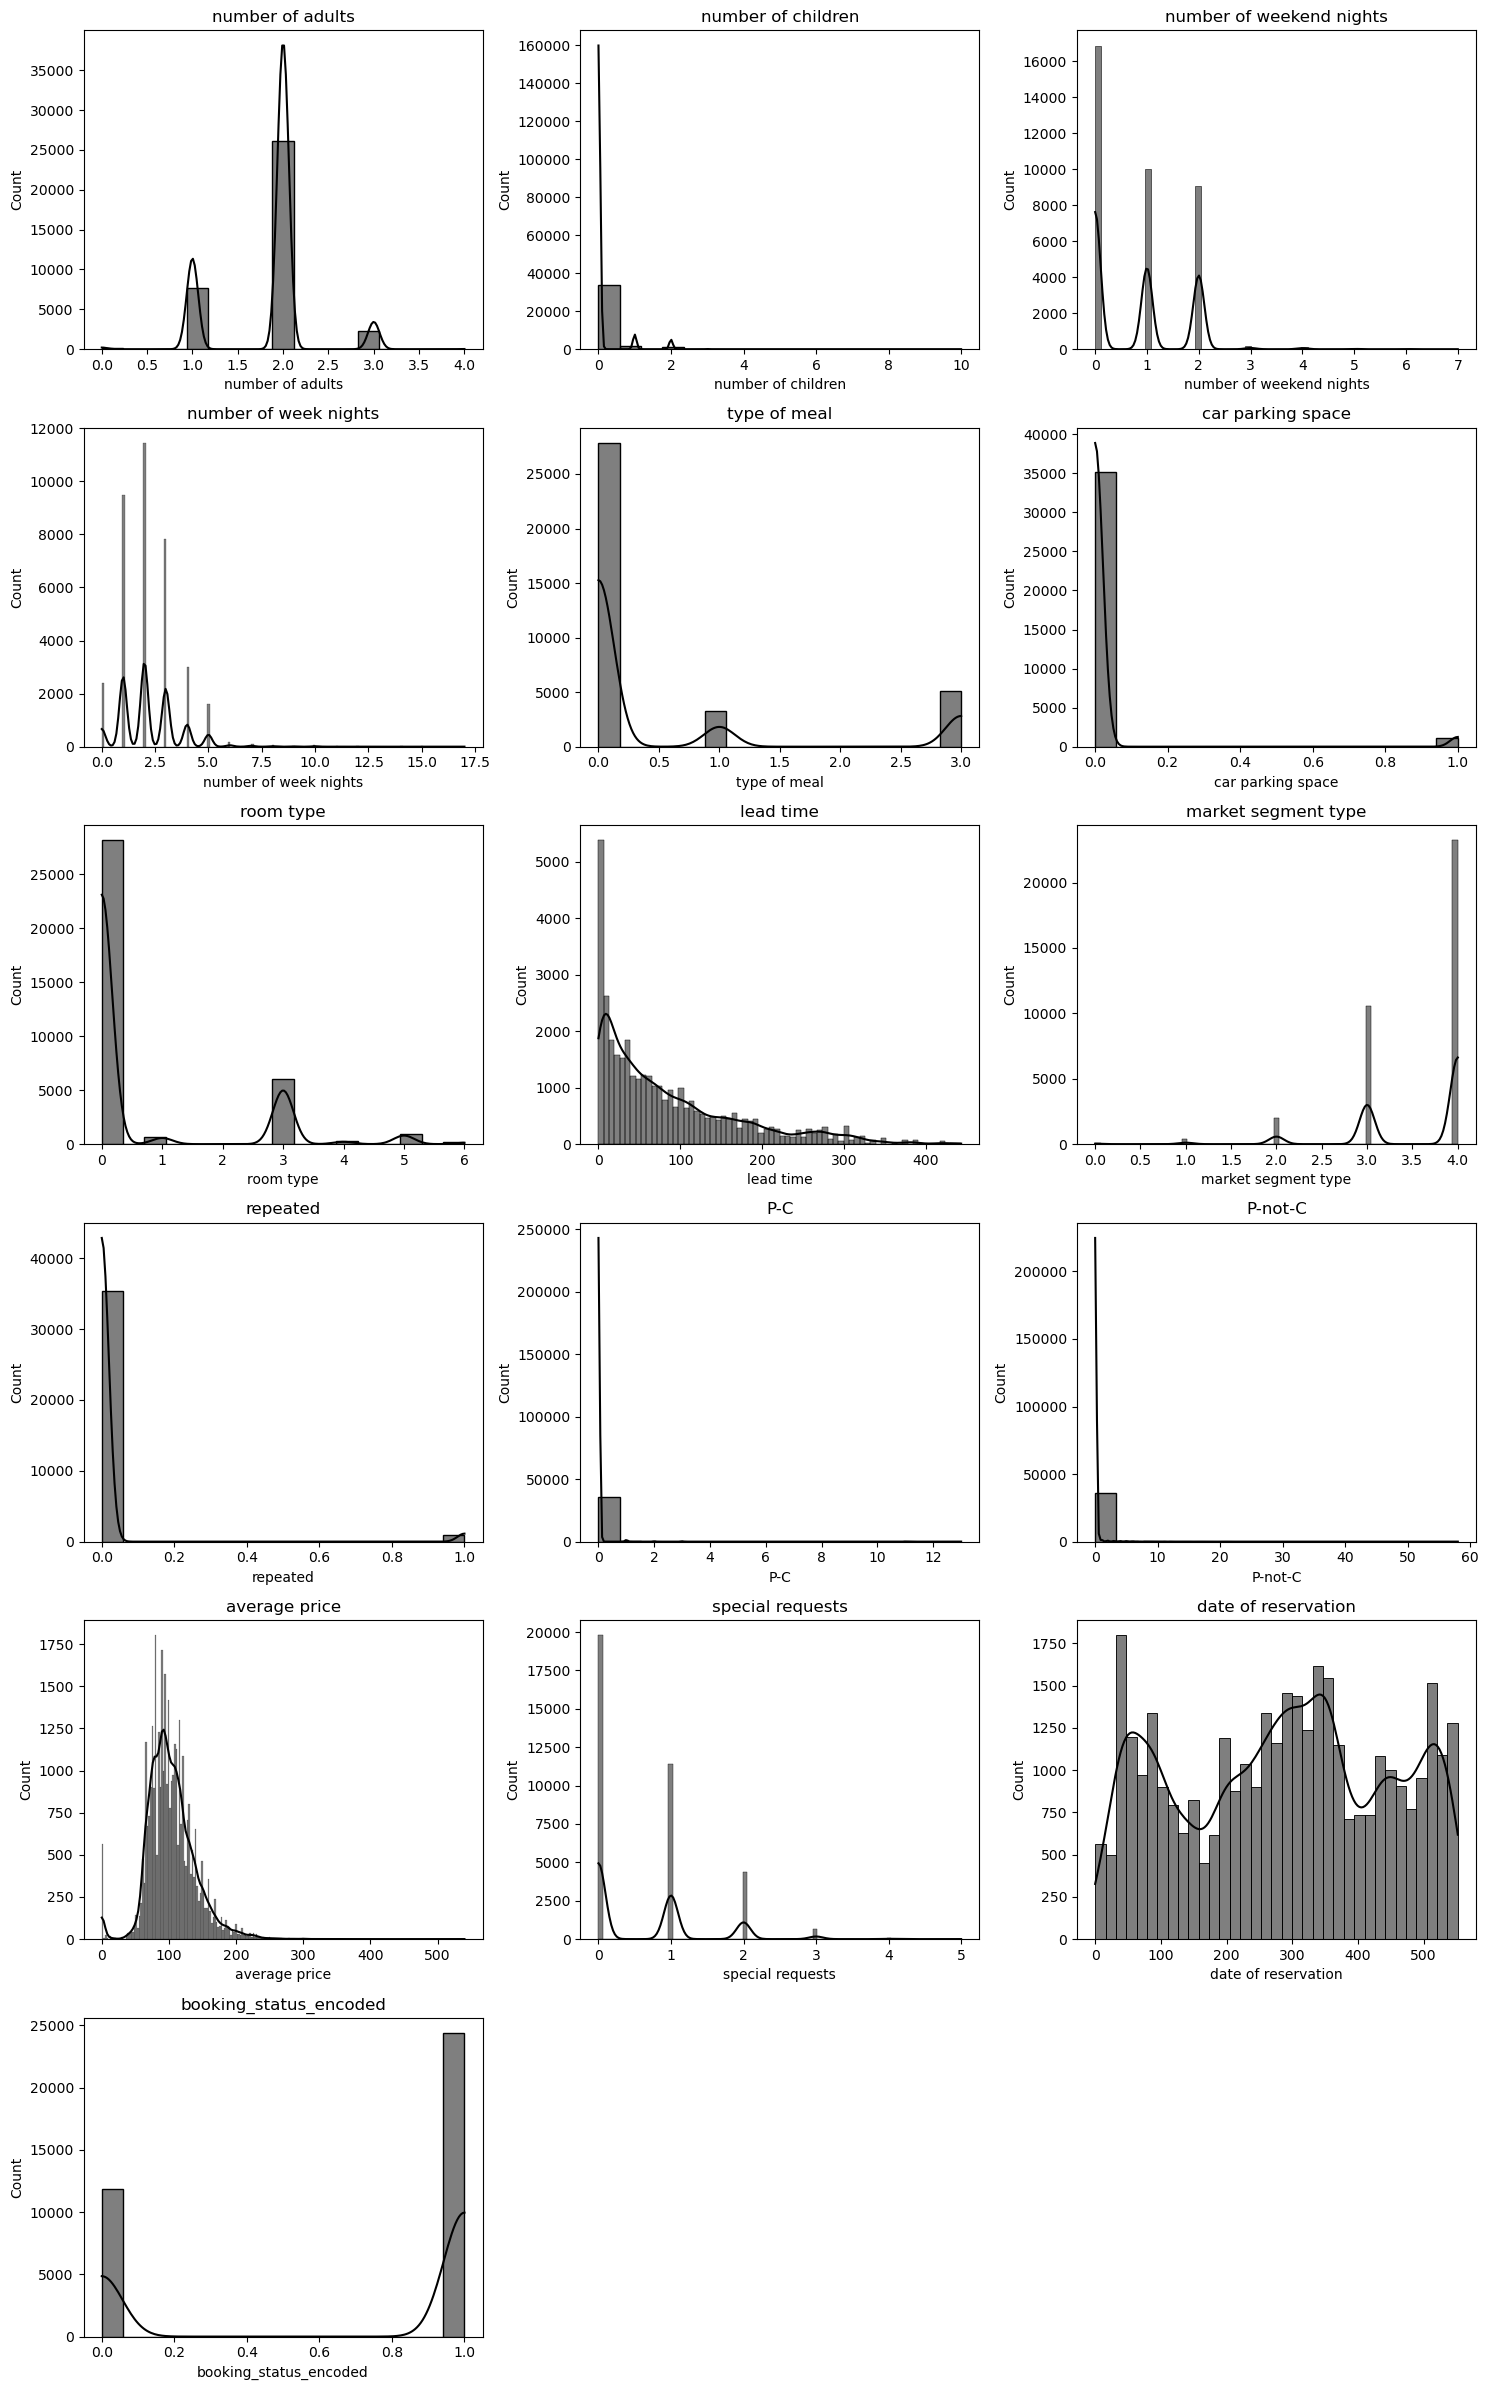

In [23]:
# Number of columns in the subplot grid
n_cols = 3   # you can change this (e.g., 4 or 5)
n_rows = math.ceil(len(df.columns) / n_cols)

# Create the figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))

# Flatten axes for easy looping
axes = axes.flatten()

# Loop through each column in the dataframe
for i, col in enumerate(df.columns):
    sns.histplot(df[col], color='black', kde=True, ax=axes[i])
    axes[i].set_title(col)

# Remove extra empty subplots (if any)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# 8) Modeling

In [24]:
# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,  # use the scaled features
    y,         # encoded target
    test_size=0.2,   # 20% for testing
    random_state=42, # reproducibility
    stratify=y       # keep same class balance
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (29028, 15) Test shape: (7257, 15)


In [25]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name}: Accuracy = {accuracy:.4f}")
    
best_model = max(results, key=results.get)
print(f"\n🔥Best Model: {best_model} with Accuracy = {results[best_model]:.4f}")

Logistic Regression: Accuracy = 0.8087
K-Nearest Neighbors: Accuracy = 0.8655
Decision Tree: Accuracy = 0.8695

🔥Best Model: Decision Tree with Accuracy = 0.8695


In [26]:
print("Model Comparison by Accuracy:")

df_res = (
    pd.Series(results, name="Accuracy")
      .to_frame()
      .sort_values(by="Accuracy", ascending=False)
)

df_res.style.background_gradient(cmap=black_red).format({"Accuracy": "{:.2%}"})

Model Comparison by Accuracy:


,Accuracy
Decision Tree,86.95%
K-Nearest Neighbors,86.55%
Logistic Regression,80.87%


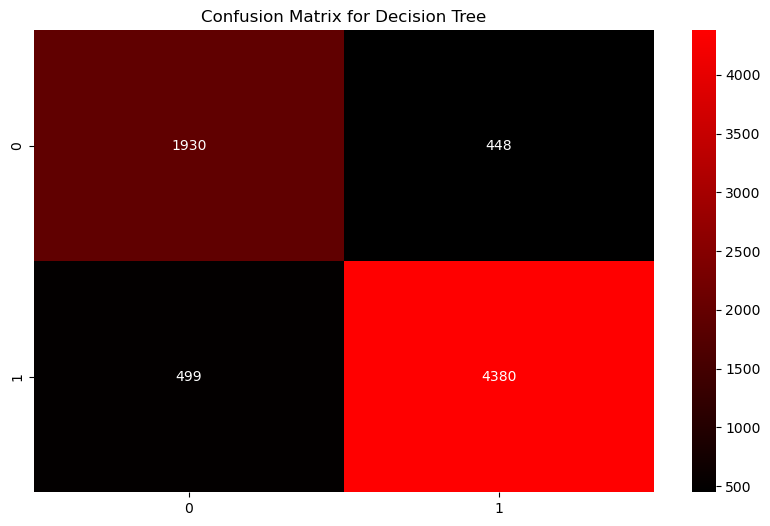

In [27]:
plt.figure(figsize=(10, 6))
y_pred_best = models[best_model].predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap=black_red)
plt.title(f'Confusion Matrix for {best_model}')
plt.show()